# Analisi dei post della pagina Facebook del MIBACT.
# 17 febbraio al 17 maggio 2016

In [1]:
import sys
import pprint
pprint.pprint(sys.path)

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pylab as pl
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
%pylab inline
%matplotlib inline
matplotlib.style.use('ggplot')

['',
 '/home/inmediaref/anaconda3/lib/python35.zip',
 '/home/inmediaref/anaconda3/lib/python3.5',
 '/home/inmediaref/anaconda3/lib/python3.5/plat-linux',
 '/home/inmediaref/anaconda3/lib/python3.5/lib-dynload',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/Sphinx-1.3.5-py3.5.egg',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/setuptools-20.3-py3.5.egg',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/IPython/extensions',
 '/home/inmediaref/.ipython']
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints size
print("Current size:", fig_size)

# Set figure width
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


Current size: [6.0, 4.0]


In [3]:
mib_fb = pd.read_csv('https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016.csv',sep=';')

In [4]:
mib_fb.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,107.000000,1.459499e+09,726.413146,731.746479,20.760563,20.56338,15.859155,4.704225,261.544601,16.751174,1025.272300
std,61.631972,2.162119e+06,591.751452,595.717572,26.140115,25.92409,19.680200,8.234295,368.887138,28.384640,949.021259
min,1.000000,1.455703e+09,17.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,54.000000,1.457628e+09,283.000000,287.000000,5.000000,5.00000,4.000000,0.000000,27.000000,1.000000,353.000000
50%,107.000000,1.459443e+09,613.000000,616.000000,13.000000,13.00000,10.000000,2.000000,165.000000,7.000000,803.000000
75%,160.000000,1.461265e+09,997.000000,1009.000000,27.000000,27.00000,21.000000,6.000000,326.000000,19.000000,1397.000000
max,213.000000,1.463473e+09,2980.000000,2997.000000,201.000000,200.00000,147.000000,61.000000,2488.000000,206.000000,5638.000000


In [5]:
mib_fb.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999127,0.033839,0.035381,0.016952,0.017501,0.027277,-0.010094,0.107086,0.051667,0.064748
post_published_unix,-0.999127,1.000000,-0.033097,-0.034650,-0.020441,-0.020955,-0.030516,0.006961,-0.109657,-0.053595,-0.065437
likes,0.033839,-0.033097,1.000000,0.999989,0.647661,0.647439,0.649203,0.486725,0.788388,0.596614,0.965517
likes_count_fb,0.035381,-0.034650,0.999989,1.000000,0.647592,0.647361,0.649048,0.486848,0.788916,0.596618,0.965714
comments_count_fb,0.016952,-0.020441,0.647661,0.647592,1.000000,0.999813,0.970484,0.828232,0.676019,0.822288,0.718518
comments_all,0.017501,-0.020955,0.647439,0.647361,0.999813,1.000000,0.971758,0.825777,0.675958,0.822015,0.718353
comments_base,0.027277,-0.030516,0.649203,0.649048,0.970484,0.971758,1.000000,0.669365,0.666178,0.829946,0.715117
comments_replies,-0.010094,0.006961,0.486725,0.486848,0.828232,0.825777,0.669365,1.000000,0.535940,0.604363,0.552446
shares,0.107086,-0.109657,0.788388,0.788916,0.676019,0.675958,0.666178,0.535940,1.000000,0.700899,0.919721
comment_likes,0.051667,-0.053595,0.596614,0.596618,0.822288,0.822015,0.829946,0.604363,0.700899,1.000000,0.696817


In [6]:
mib_fb.cov()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,3.798500e+03,-1.331393e+08,1.234118e+03,1.299028e+03,2.731132e+01,2.796226e+01,3.308491e+01,-5.122642,2.434627e+03,9.038679e+01,3.787094e+03
post_published_unix,-1.331393e+08,4.674757e+12,-4.234614e+07,-4.462929e+07,-1.155272e+06,-1.174546e+06,-1.298479e+06,123932.197582,-8.745977e+07,-3.289194e+06,-1.342697e+08
likes,1.234118e+03,-4.234614e+07,3.501698e+05,3.525130e+05,1.001831e+04,9.932120e+03,7.560478e+03,2371.641642,1.720968e+05,1.002111e+04,5.422198e+05
likes_count_fb,1.299028e+03,-4.462929e+07,3.525130e+05,3.548794e+05,1.008438e+04,9.997478e+03,7.609337e+03,2388.141642,1.733662e+05,1.008835e+04,5.459650e+05
comments_count_fb,2.731132e+01,-1.155272e+06,1.001831e+04,1.008438e+04,6.833056e+02,6.775318e+02,4.992586e+02,178.273186,6.518688e+03,6.101194e+02,1.782465e+04
comments_all,2.796226e+01,-1.174546e+06,9.932120e+03,9.997478e+03,6.775318e+02,6.720585e+02,4.957826e+02,176.275910,6.464229e+03,6.048767e+02,1.767328e+04
comments_base,3.308491e+01,-1.298479e+06,7.560478e+03,7.609337e+03,4.992586e+02,4.957826e+02,3.873103e+02,108.472296,4.836299e+03,4.636204e+02,1.335618e+04
comments_replies,-5.122642e+00,1.239322e+05,2.371642e+03,2.388142e+03,1.782732e+02,1.762759e+02,1.084723e+02,67.803614,1.627931e+03,1.412562e+02,4.317105e+03
shares,2.434627e+03,-8.745977e+07,1.720968e+05,1.733662e+05,6.518688e+03,6.464229e+03,4.836299e+03,1627.930707,1.360777e+05,7.338924e+03,3.219777e+05
comment_likes,9.038679e+01,-3.289194e+06,1.002111e+04,1.008835e+04,6.101194e+02,6.048767e+02,4.636204e+02,141.256245,7.338924e+03,8.056878e+02,1.877060e+04


In [7]:
mib_fb[['likes','shares']].corr()

,likes,shares
likes,1.000000,0.788388
shares,0.788388,1.000000


# Esploriamo a fondo l'intero dataset

In [46]:
mib_fb.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

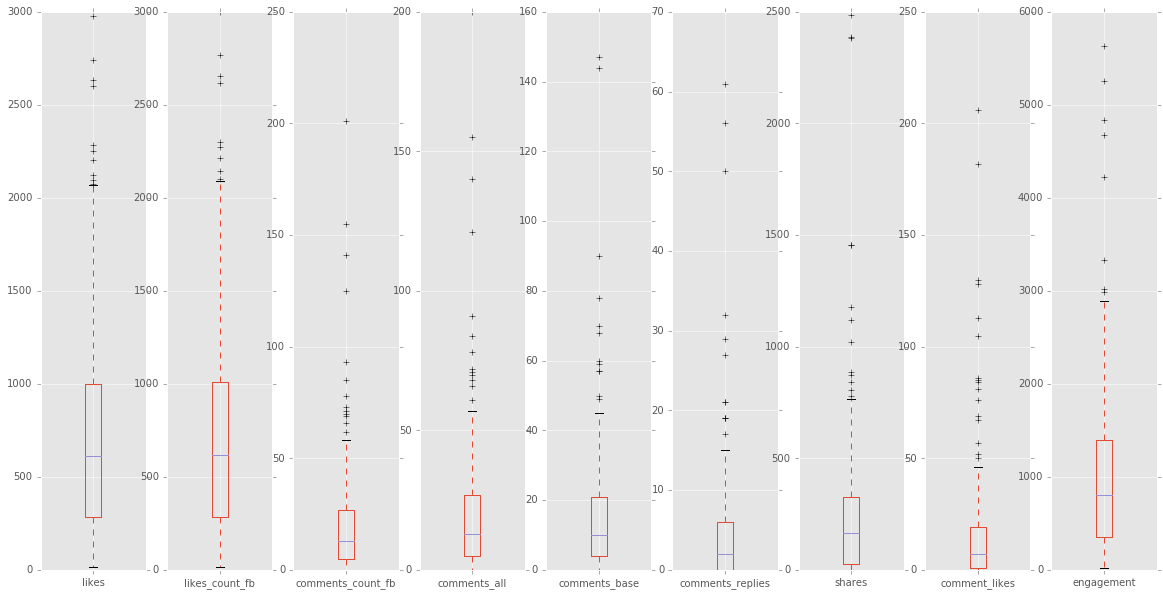

In [47]:
boxplots = mib_fb[mib_fb.columns[10:]].plot(subplots=True, kind='box', figsize=(20,10))


=============================================================================================================

# - Parte 1

**Cerchiamo innanzitutto di capire la concentrazione dei valori e la distribuzione degli outliers**

- **Engagement**

In [9]:
engage = mib_fb['engagement']

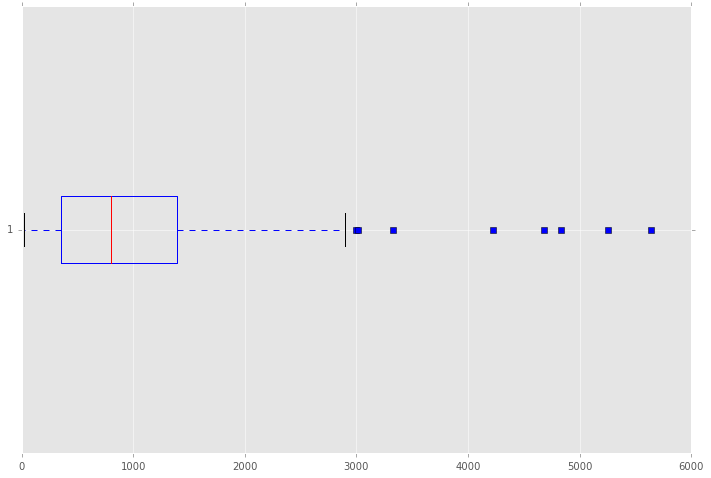

In [10]:
engage_boxplt = plt.boxplot(engage, 0, 'rs', 0)

**Il boxplot evidenzia un gran numero di outliers nei dati di engagement**

**E evidente che NON siamo in presenza di una "distribuzione normale"**

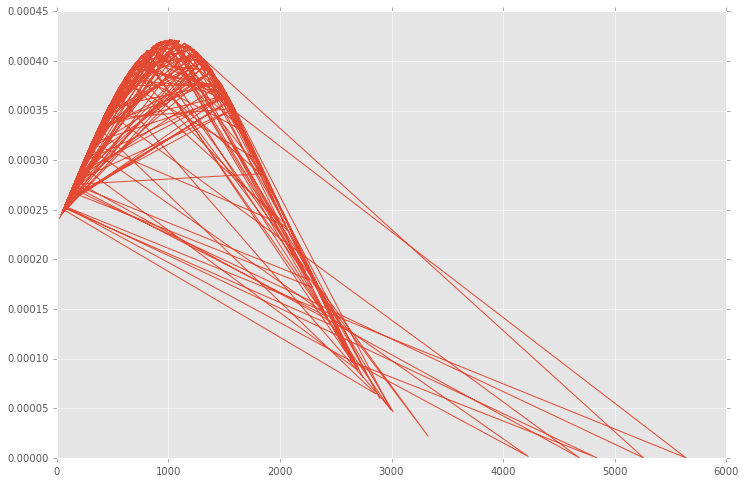

In [11]:
#Proviamo a rappresentare una gaussiana con i dati di engagement
mib_fb_media = np.mean(engage)
mib_fb_std = np.std(engage)
pdf = stats.norm.pdf(engage, mib_fb_media, mib_fb_std)
plt.plot(engage, pdf)

# O anche...

(array([ 82.,  54.,  46.,  12.,   9.,   5.,   0.,   1.,   2.,   2.]),
 array([   25. ,   586.3,  1147.6,  1708.9,  2270.2,  2831.5,  3392.8,
         3954.1,  4515.4,  5076.7,  5638. ]),
 <a list of 10 Patch objects>)

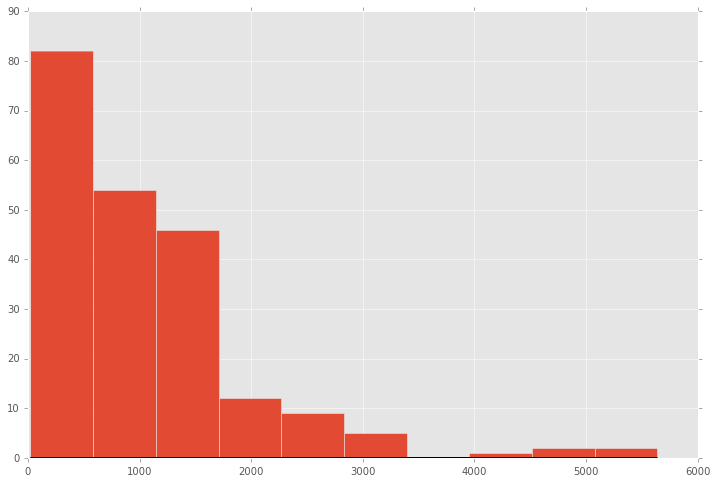

In [12]:
engage_norm = stats.norm.pdf(engage, np.mean(engage), np.std(engage))

pl.plot(engage, engage_norm, '-0')

pl.hist(engage)

**No, decisamente una distribuzione "non normale"**

In [13]:
engage.mean()

1025.2723004694835

In [14]:
engage.std()

949.0212589984502

In [15]:
engage.median()

803.0

# E normalizzando i dati con una trasformazione logaritmica?

(array([  3.,   9.,  15.,  12.,  17.,  32.,  47.,  53.,  19.,   6.]),
 array([ 3.21887582,  3.76071671,  4.30255759,  4.84439848,  5.38623936,
         5.92808025,  6.46992113,  7.01176202,  7.5536029 ,  8.09544379,
         8.63728467]),
 <a list of 10 Patch objects>)

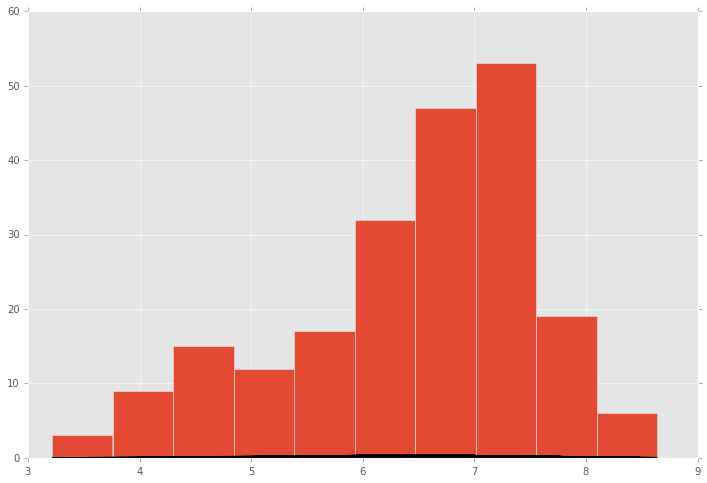

In [16]:
engage_log = np.log(mib_fb['engagement'])

engage_log_new = stats.norm.pdf(engage_log, np.mean(engage_log), np.std(engage_log))

pl.plot(engage_log, engage_log_new, '-0')

pl.hist(engage_log)

**Meglio, mal risultato è comunque caratterizzato da una asimmetria fortemente negativa.
E' la classica situazione in cui la distribuzione presenta pochi dati con forti scarti negativi bilanciati da molti dati con deboli scarti positivi.**

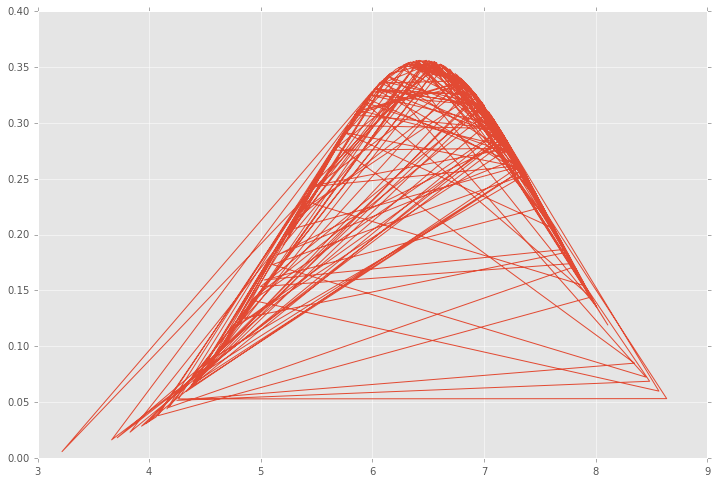

In [17]:

linea = stats.norm.pdf(engage_log, np.mean(engage_log), np.std(engage_log))
plt.plot(engage_log, linea)

# - Parte 2

In [18]:
colonne = mib_fb.columns
colonne

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

In [19]:
mib_index = mib_fb.index
mib_index

RangeIndex(start=0, stop=213, step=1)

# Contiamo le tipologie di post più utilizzate

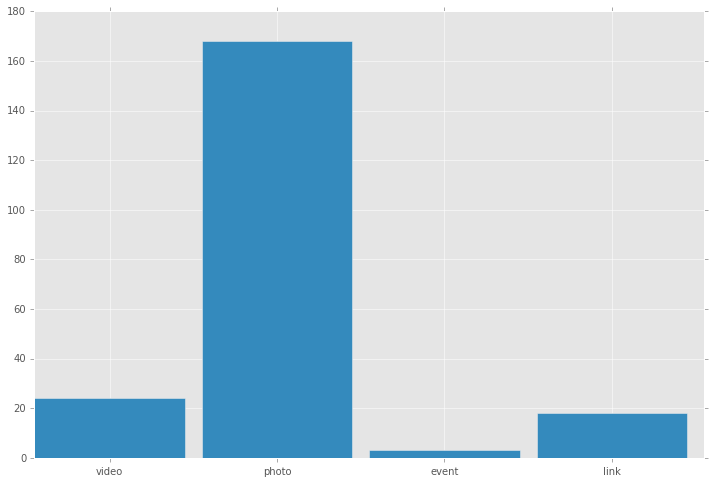

In [20]:
counter = Counter(mib_fb['post_type'])
mib_fb_ptype = counter.keys()
mib_fb_ptype_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(mib_fb_ptype))
width = 0.9
plt.bar(indexes, mib_fb_ptype_counts, width)
plt.xticks(indexes + width * 0.5, mib_fb_ptype)
plt.show()



In [21]:
counter

Counter({'event': 3, 'link': 18, 'photo': 168, 'video': 24})

# - Selezioniamo le foto ['Photo']

In [22]:
mib_photo = mib_fb.loc[mib_fb['post_type']=='photo']
#mib_photo
mib_photo.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

In [23]:
mib_photo.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,105.559524,1.459554e+09,824.916667,831.083333,22.202381,21.988095,16.714286,5.273810,303.976190,18.452381,1169.333333
std,62.746396,2.205337e+06,603.264378,607.155352,25.508613,25.271694,17.817485,8.910535,395.120446,28.985193,984.054826
min,1.000000,1.455703e+09,41.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
25%,50.500000,1.457668e+09,384.500000,388.000000,7.000000,7.000000,6.000000,0.000000,75.500000,2.000000,507.750000
50%,104.000000,1.459590e+09,733.500000,742.000000,14.000000,14.000000,13.000000,2.000000,210.000000,9.000000,994.500000
75%,159.500000,1.461323e+09,1087.250000,1095.750000,29.250000,29.000000,21.250000,6.000000,344.750000,20.000000,1525.750000
max,213.000000,1.463473e+09,2980.000000,2997.000000,201.000000,200.000000,144.000000,61.000000,2488.000000,206.000000,5638.000000


In [24]:
#mib_photo.cov()

In [25]:
mib_photo.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999135,0.053500,0.055143,0.069447,0.070567,0.089366,0.021444,0.130604,0.091620,0.089749
post_published_unix,-0.999135,1.000000,-0.053371,-0.055029,-0.072850,-0.073935,-0.092364,-0.025000,-0.133333,-0.093643,-0.090912
likes,0.053500,-0.053371,1.000000,0.999989,0.677441,0.678327,0.729581,0.464974,0.779935,0.626370,0.962071
likes_count_fb,0.055143,-0.055029,0.999989,1.000000,0.677704,0.678584,0.729867,0.465132,0.780543,0.626628,0.962322
comments_count_fb,0.069447,-0.072850,0.677441,0.677704,1.000000,0.999773,0.972442,0.891022,0.722828,0.816639,0.755259
comments_all,0.070567,-0.073935,0.678327,0.678584,0.999773,1.000000,0.973536,0.889479,0.723871,0.816834,0.756233
comments_base,0.089366,-0.092364,0.729581,0.729867,0.972442,0.973536,1.000000,0.761505,0.764489,0.853961,0.804377
comments_replies,0.021444,-0.025000,0.464974,0.465132,0.891022,0.889479,0.761505,1.000000,0.524343,0.609093,0.536367
shares,0.130604,-0.133333,0.779935,0.780543,0.722828,0.723871,0.764489,0.524343,1.000000,0.732676,0.919825
comment_likes,0.091620,-0.093643,0.626370,0.626628,0.816639,0.816834,0.853961,0.609093,0.732676,1.000000,0.728607


# - Covarianza likes | shares nei 'foto-post' pubblicati

In [26]:
mib_fbphoto_likes = mib_photo['likes']
print(mib_fbphoto_likes.count(),"righe")

photolike_mean = mib_fbphoto_likes.mean()
print("media", photolike_mean)
photolike_median = mib_fbphoto_likes.median()
print("mediana", photolike_median)
photolike_std = mib_fbphoto_likes.std()
print("deviazione standard", photolike_std)

168 righe
media 824.9166666666666
mediana 733.5
deviazione standard 603.26437751755


In [27]:
mib_fbphoto_shares = mib_photo['shares']

In [28]:
mib_fbphoto_engag = mib_photo['engagement']

print(mib_fbphoto_engag.count(),"righe")

photoeng_mean = mib_fbphoto_engag.mean()
print("media =", photoeng_mean)
photoeng_median = mib_fbphoto_engag.median()
print("mediana =", photoeng_median)
photoeng_std = mib_fbphoto_engag.std()
print("deviazione standard =", photoeng_std)

168 righe
media = 1169.3333333333333
mediana = 994.5
deviazione standard = 984.054825809823


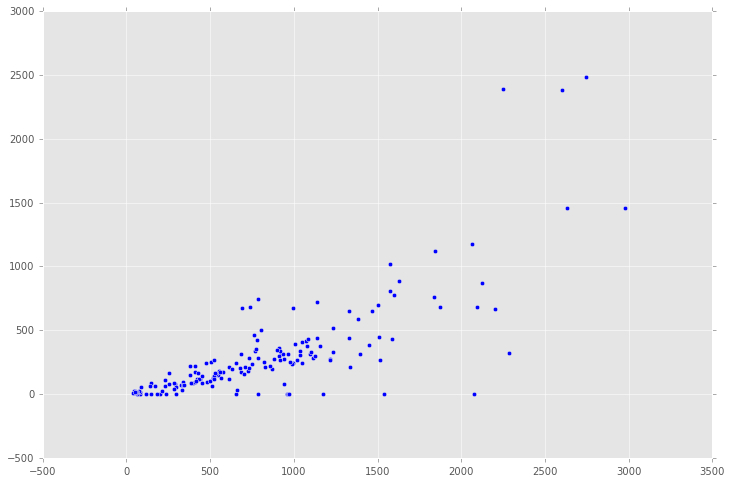

In [29]:
pl.scatter(mib_fbphoto_likes,mib_fbphoto_shares)

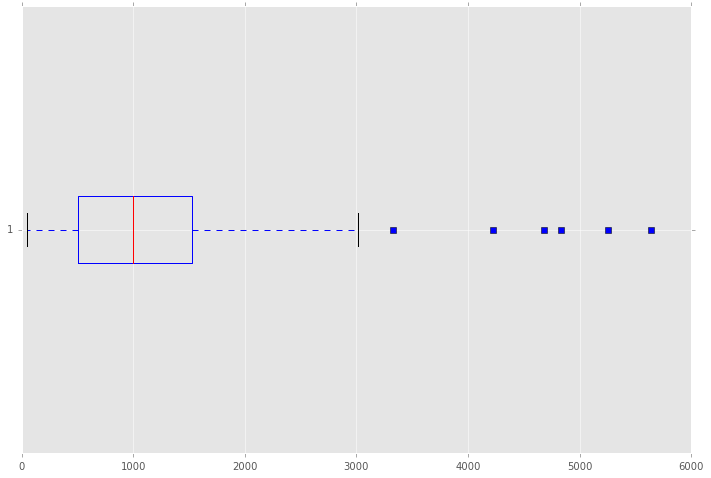

In [30]:
photoeng_boxplt = plt.boxplot(mib_fbphoto_engag, 0, 'rs', 0)

# Normalizziamo togliendo gli outliers, i valori massimi e minimi. 
# Il dataset si riduce così a 132 post (foto)

In [31]:
mib_photo_eng_norm = mib_photo.loc[mib_photo['engagement'] >= 185]
mib_photo_eng_norm2 = mib_photo_eng_norm.loc[mib_photo_eng_norm['engagement'] <= 2153  ]
print(mib_photo_eng_norm2.count())

﻿ord                   132
post_type              132
by                     132
post_message           132
picture                132
link                   132
link_domain            132
post_published         132
post_published_unix    132
post_published_sql     132
likes                  132
likes_count_fb         132
comments_count_fb      132
comments_all           132
comments_base          132
comments_replies       132
shares                 132
comment_likes          132
engagement             132
post_id                132
post_link              132
dtype: int64


In [32]:
mib_photo_eng_norm2.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,102.727273,1.459651e+09,730.833333,736.507576,19.015152,18.825758,14.136364,4.689394,223.878788,13.840909,987.378788
std,60.511319,2.123158e+06,358.660276,360.984204,16.459520,16.238441,10.387730,7.492625,168.399200,15.810823,492.857977
min,1.000000,1.455703e+09,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000
25%,47.500000,1.457910e+09,425.000000,429.500000,8.000000,8.000000,7.000000,1.000000,86.000000,3.000000,578.000000
50%,102.500000,1.459715e+09,716.500000,722.000000,14.000000,14.000000,12.000000,2.000000,207.500000,9.000000,951.500000
75%,154.500000,1.461346e+09,990.000000,995.250000,27.000000,27.000000,20.250000,6.000000,314.500000,19.000000,1356.750000
max,213.000000,1.463473e+09,1588.000000,1594.000000,125.000000,121.000000,60.000000,61.000000,743.000000,84.000000,2073.000000


**ottenendo così un set senza normalizzato senza outliers**

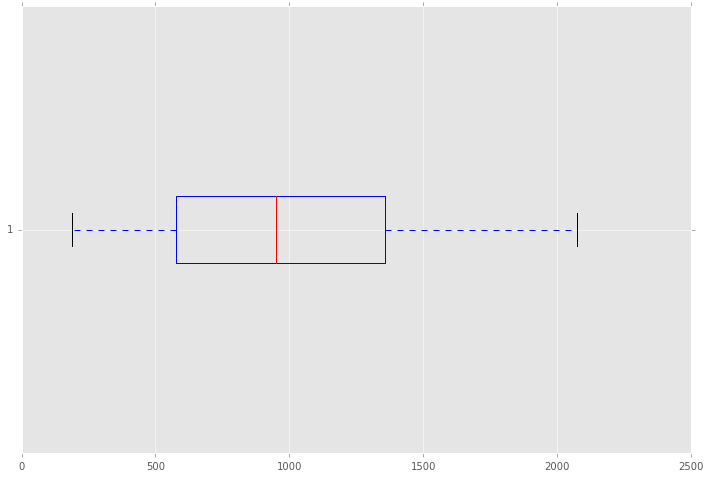

In [33]:
mib_photo_norm_engagement = mib_photo_eng_norm2['engagement']
mib_photo_norm_engagement
mib_photo_norm_boxplt = plt.boxplot(mib_photo_norm_engagement, 0, 'rs', 0)


- **Esportiamo il nuovo dataframe in un file csv**

In [34]:
mib_photo_eng_norm2.to_csv('photo_post_norm.csv')

- **Vediamo i valori di covarianza**

In [35]:
mib_photo_eng_norm2.cov()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,3.661620e+03,-1.283539e+08,-3.774046e+02,-3.187384e+02,17.011797,21.723109,6.968772,14.754337,1.429203e+03,-10.028452,1.063493e+03
post_published_unix,-1.283539e+08,4.507798e+12,1.493925e+07,1.287176e+07,-734626.679736,-898177.034178,-316877.705413,-581299.328765,-5.090270e+07,222086.293720,-3.663954e+07
likes,-3.774046e+02,1.493925e+07,1.286372e+05,1.294667e+05,2675.666667,2656.802799,1943.633588,713.169211,3.622887e+04,1821.034351,1.693439e+05
likes_count_fb,-3.187384e+02,1.287176e+07,1.294667e+05,1.303096e+05,2695.809045,2676.768506,1958.189799,718.578707,3.654773e+04,1832.035566,1.705232e+05
comments_count_fb,1.701180e+01,-7.346267e+05,2.675667e+03,2.695809e+03,270.915799,267.147698,159.486468,107.661231,1.085666e+03,168.384108,4.196864e+03
comments_all,2.172311e+01,-8.981770e+05,2.656803e+03,2.676769e+03,267.147698,263.686965,157.726232,105.960733,1.073322e+03,166.544587,4.160357e+03
comments_base,6.968772e+00,-3.168777e+05,1.943634e+03,1.958190e+03,159.486468,157.726232,107.904927,49.821305,6.989938e+02,122.594379,2.922948e+03
comments_replies,1.475434e+01,-5.812993e+05,7.131692e+02,7.185787e+02,107.661231,105.960733,49.821305,56.139429,3.743285e+02,43.950208,1.237409e+03
shares,1.429203e+03,-5.090270e+07,3.622887e+04,3.654773e+04,1085.665973,1073.322230,698.993754,374.328476,2.835829e+04,753.339348,6.641382e+04
comment_likes,-1.002845e+01,2.220863e+05,1.821034e+03,1.832036e+03,168.384108,166.544587,122.594379,43.950208,7.533393e+02,249.982130,2.990900e+03


- **Vediamo i coefficienti di correlazione**

In [36]:
mib_photo_eng_norm2.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999057,-0.017390,-0.014592,0.017080,0.022108,0.011087,0.032542,0.140255,-0.010482,0.035660
post_published_unix,-0.999057,1.000000,0.019618,0.016795,-0.021022,-0.026052,-0.014368,-0.036541,-0.142370,0.006616,-0.035014
likes,-0.017390,0.019618,1.000000,0.999969,0.453243,0.456175,0.521688,0.265384,0.599835,0.321130,0.957998
likes_count_fb,-0.014592,0.016795,0.999969,1.000000,0.453716,0.456645,0.522211,0.265676,0.601218,0.320990,0.958459
comments_count_fb,0.017080,-0.021022,0.453243,0.453716,1.000000,0.999516,0.932795,0.872988,0.391687,0.647038,0.517352
comments_all,0.022108,-0.026052,0.456175,0.456645,0.999516,1.000000,0.935059,0.870897,0.392506,0.648682,0.519834
comments_base,0.011087,-0.014368,0.521688,0.522211,0.932795,0.935059,1.000000,0.640119,0.399588,0.746441,0.570924
comments_replies,0.032542,-0.036541,0.265384,0.265676,0.872988,0.870897,0.640119,1.000000,0.296674,0.370999,0.335087
shares,0.140255,-0.142370,0.599835,0.601218,0.391687,0.392506,0.399588,0.296674,1.000000,0.282941,0.800197
comment_likes,-0.010482,0.006616,0.321130,0.320990,0.647038,0.648682,0.746441,0.370999,0.282941,1.000000,0.383818


In [37]:
mib_photo_eng_norm2.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

- **l coefficiente di correlazione tra 'likes' e 'shares' è 0.599835 **
- ** I due valori non sono correlati, come si può notare dal grafico**

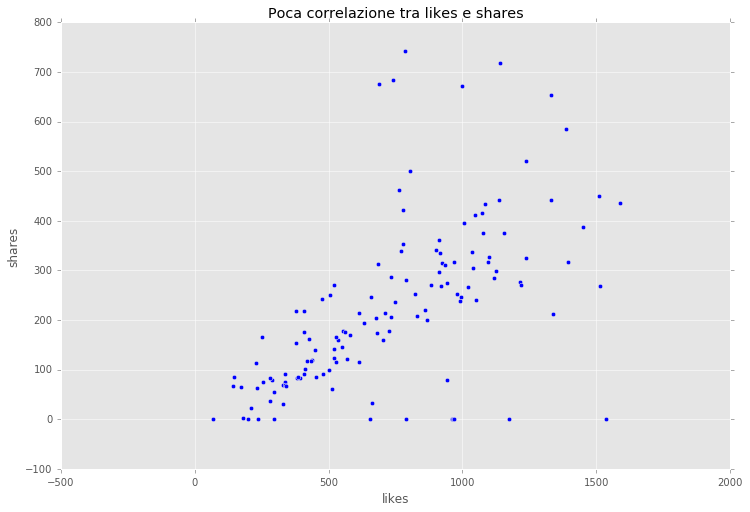

In [38]:
x_norm2 = mib_photo_eng_norm2['likes']
y_norm2 = mib_photo_eng_norm2['shares']
pl.scatter(x_norm2,y_norm2)

pylab.xlabel('likes')
pylab.ylabel('shares')
pylab.title('Poca correlazione tra likes e shares')


- **E' evidente che non vale la pena di esplorare il rapporto tra i like dei post con foto e le relative condivisioni **

In [39]:
mib_photo_eng_norm2.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

# L'andamento dei likes ricevuti dai post nel tempo è imprevedibile e sembra non seguire alcun pattern

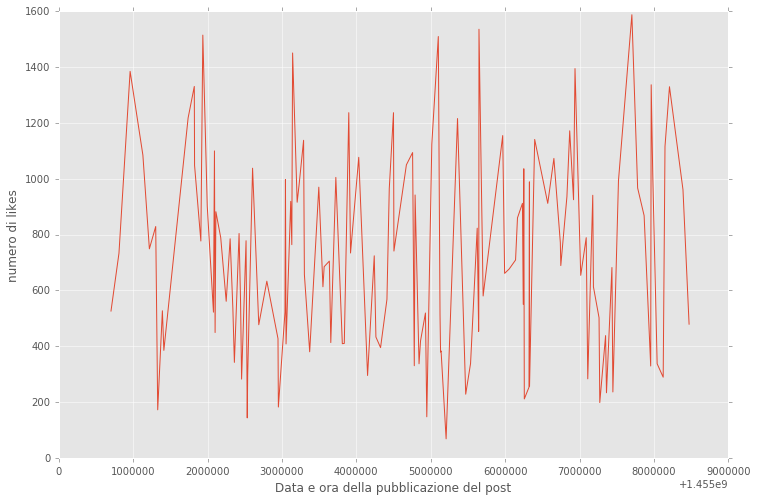

In [40]:
x = mib_photo_eng_norm2['post_published_unix']
y = mib_photo_eng_norm2['likes']

plt.xlabel('Data e ora della pubblicazione del post')
plt.ylabel('numero di likes')

plt.plot(x,y,label='Andamento dei like in base al momento della condivisione')
plt.show()

# Linguaggio

In [41]:
mib_fb.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

In [42]:
testo = mib_fb[['post_message']]
#testo
testo.tail()

,post_message
208,#Buongiorno dal Parco Archeologico Paestum #Sa...
209,Uffizi Virtual Experience: scopri i capolavori...
210,#Buongiorno dal Museo Archeologico Nazionale e...
211,_Distruzioni saccheggi e rinascite. Gli attacc...
212,#Buongiorno dalla Pinacoteca Nazionale di Bolo...


In [43]:
testo2 = testo.iloc[:]
testo2.count()

post_message    213
dtype: int64

# - Commenti

In [ ]:
# https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016_comments.csv

In [ ]:
mib_comm = pd.read_csv('https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016_comments.csv',sep=';')

In [ ]:
mib_comm.describe()

In [ ]:
mib_comm.columns

In [ ]:
mib_comm_repl = DataFrame(mib_comm,columns=['post_text','comment_message','comment_id'])
mib_comm_repl.count()
#mib_comm_repl

# intervallo... 
# camperisti

In [ ]:
pd.options.display.max_colwidth = 500
mib_comm_camper = mib_comm_repl[mib_comm_repl['comment_id']=='10154223947508711_10154224070838711']
mib_comm_camper